# **Memprediksi Biaya Medical dengan Linear Regression**

In [ ]:
# Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Preprocessing data**

In [ ]:
# Load data
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Melihat ukuran data
df.shape

(1338, 7)

In [ ]:
# Melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Melihat deskripsi data
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [ ]:
# Melihat banyaknya data null
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

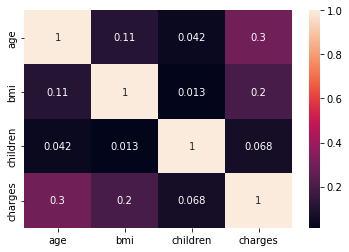

In [ ]:
sns.heatmap(df.corr(),annot=True)

**EDA**

In [ ]:
# Visualisasi data untuk data kategori
def plot_cat_var(df, var):
    df = df.copy()
    print(f'Total dari {var}: ',df[var].nunique())
    print(f'{var}: ', df[var].unique())
    plt.figure(figsize = (15, 7))
    plt.title(f'Distribution of {var} by Charges')
    sns.barplot(
        x = var,
        y = 'charges',
        data = df
    )
    plt.xticks(rotation = 'vertical')
    plt.ylabel('Charges on Dollars')
    plt.show()

Total dari sex:  2
sex:  ['female' 'male']


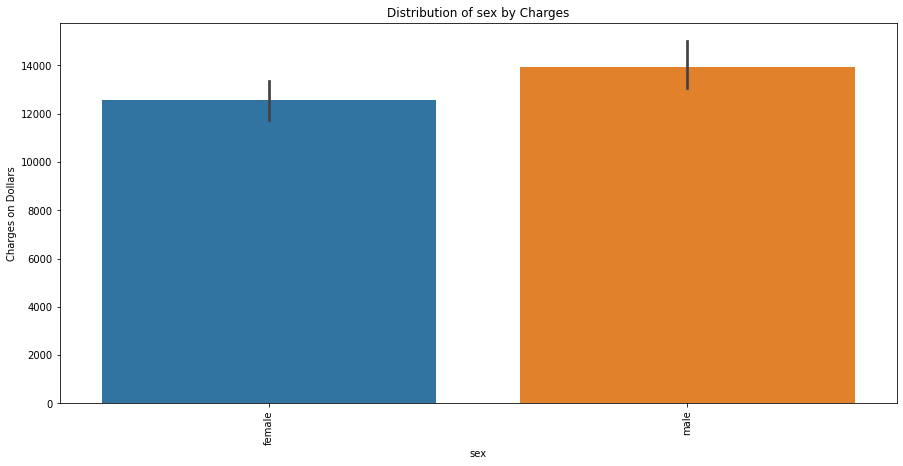

Total dari smoker:  2
smoker:  ['yes' 'no']


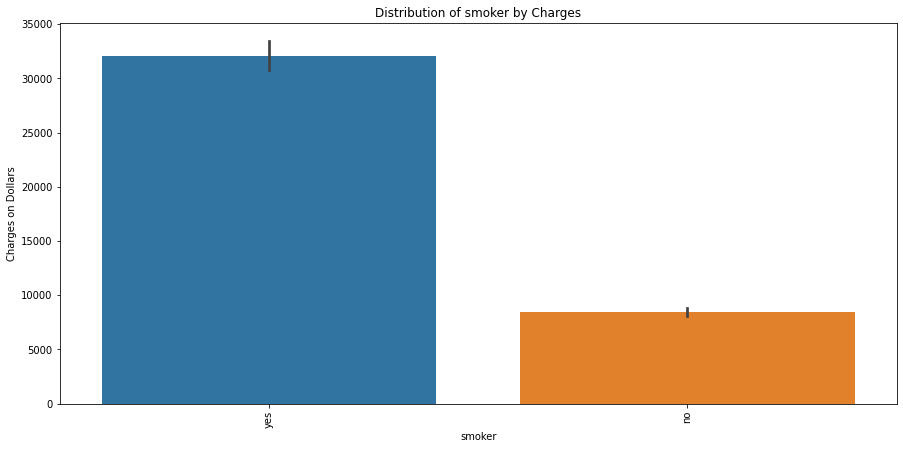

Total dari region:  4
region:  ['southwest' 'southeast' 'northwest' 'northeast']


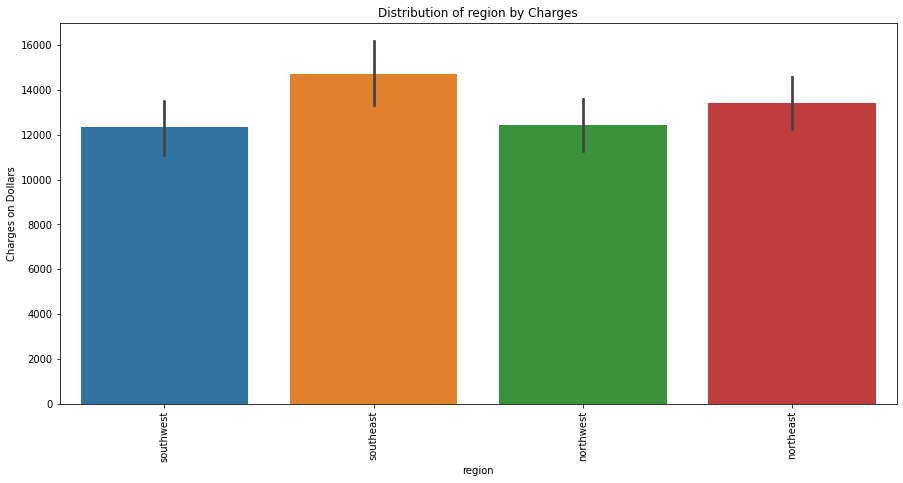

In [ ]:
for var in kolom:
  plot_cat_var(df, var)

In [ ]:
def plot_cat1_var(df, var):
    df = df.copy()
    print(f'Total dari {var}: ',df[var].nunique())
    print(f'{var}: ', df[var].unique())
    plt.figure(figsize = (15, 7))
    plt.title(f'Distribution of {var} by Charges')
    sns.boxplot(
        x = var,
        y = 'charges',
        data = df
    )
    plt.xticks(rotation = 'vertical')
    plt.ylabel('Charges on Dollars')
    plt.show()

Total dari sex:  2
sex:  ['female' 'male']


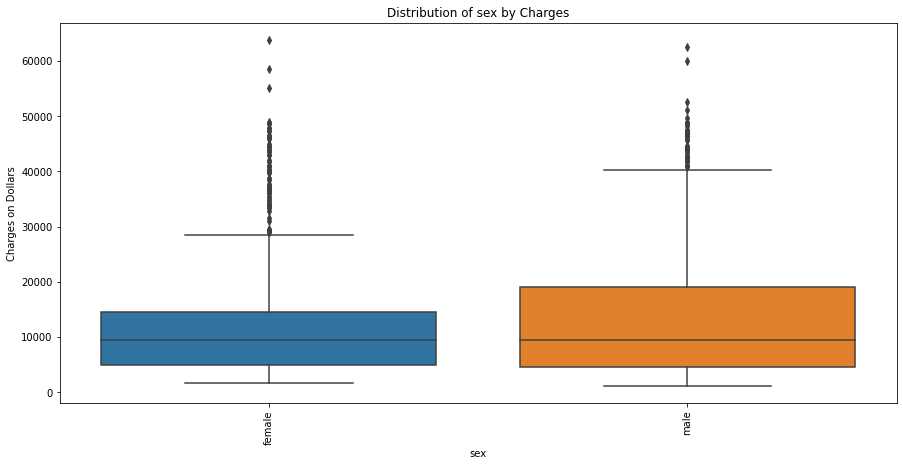

Total dari smoker:  2
smoker:  ['yes' 'no']


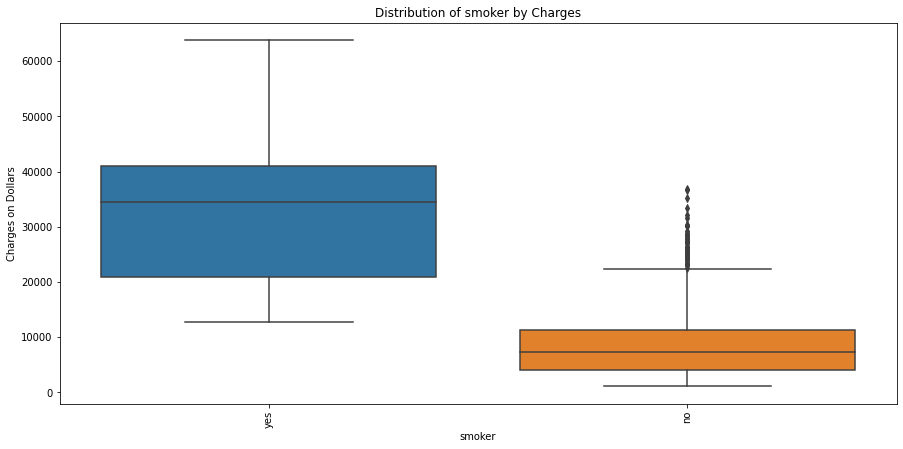

Total dari region:  4
region:  ['southwest' 'southeast' 'northwest' 'northeast']


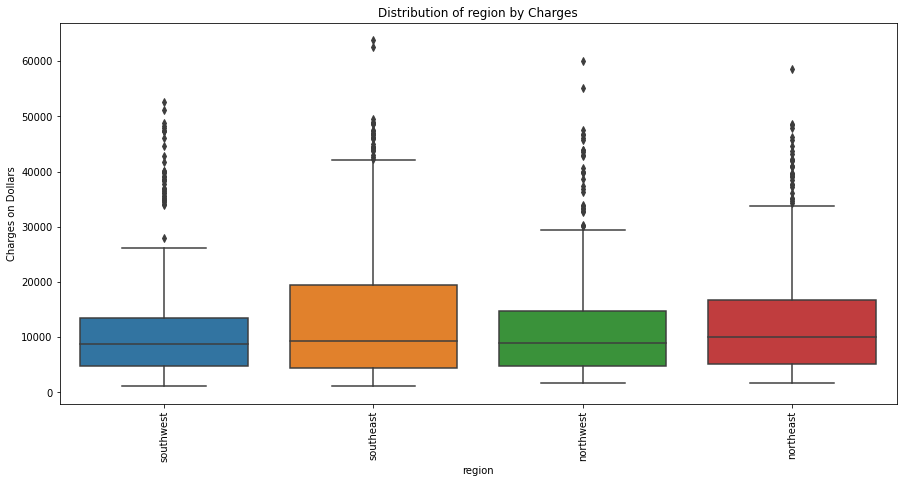

In [ ]:
# Visualisasi yang kedua
for var in kolom:
  plot_cat1_var(df, var)

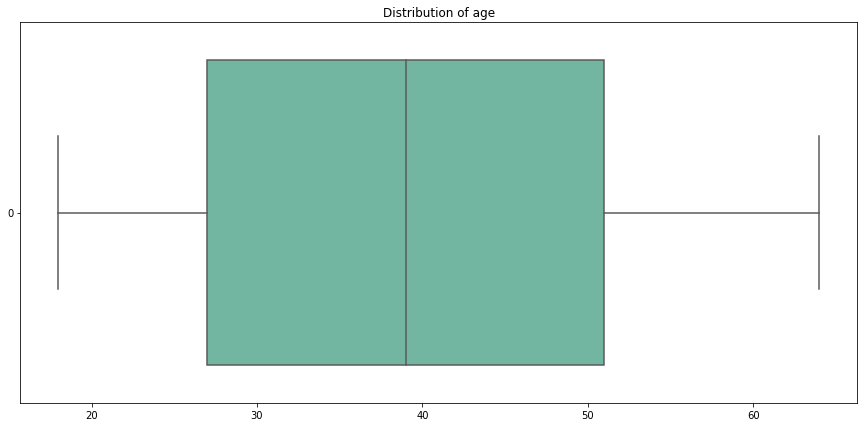

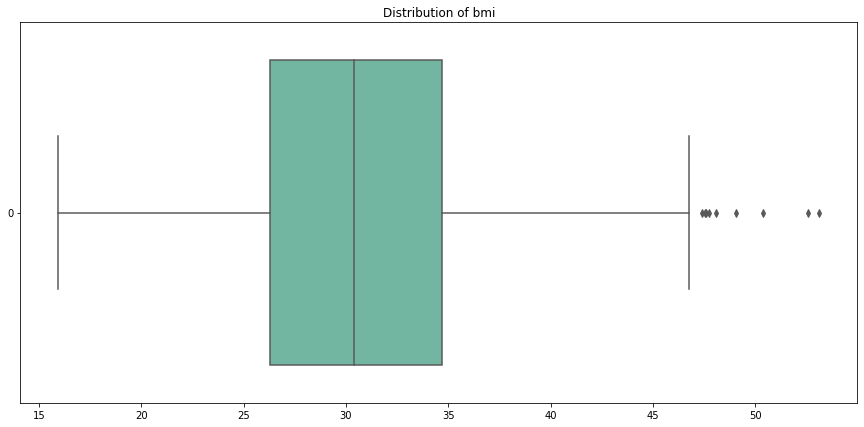

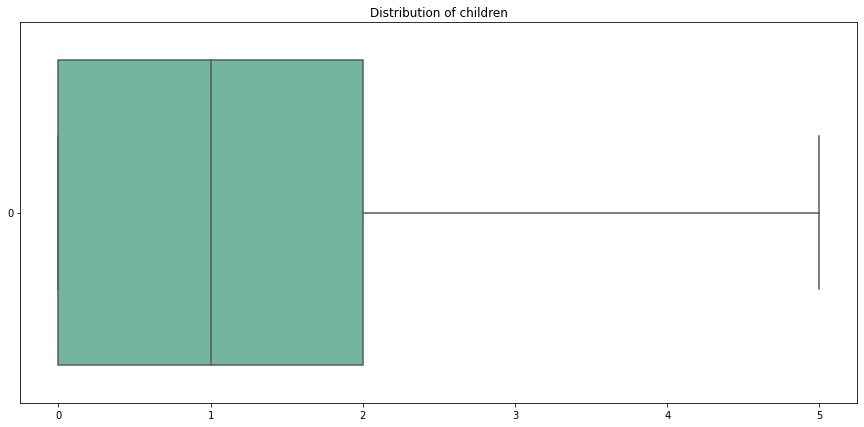

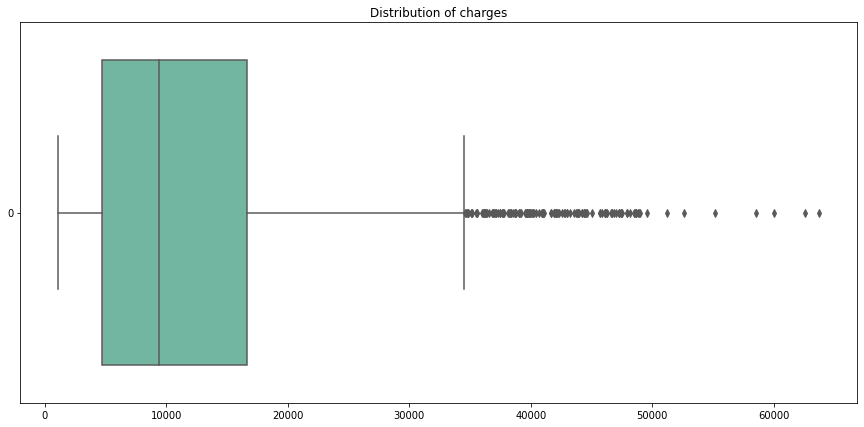

In [ ]:
# Visualisasi data untuk data numerik
num = ['age','bmi','children','charges']
for i in num:
  plt.figure(figsize = (15, 7))
  plt.title(f'Distribution of {i}')
  sns.boxplot(data=df[i], orient="h", palette="Set2")
  plt.show()

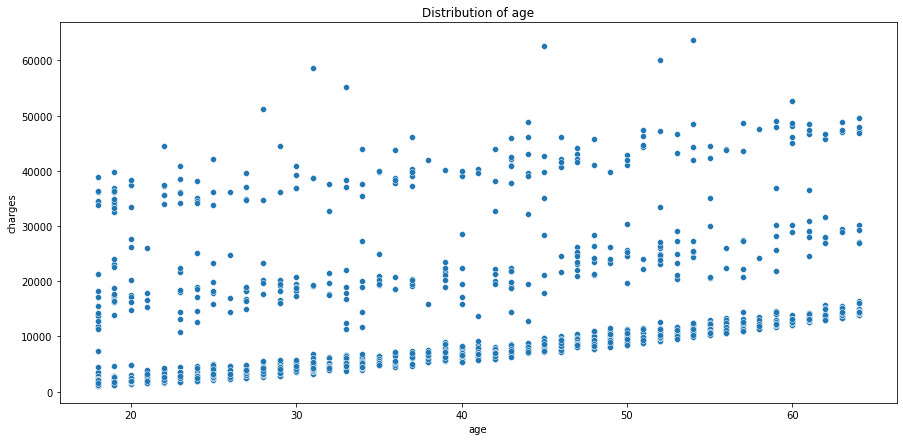

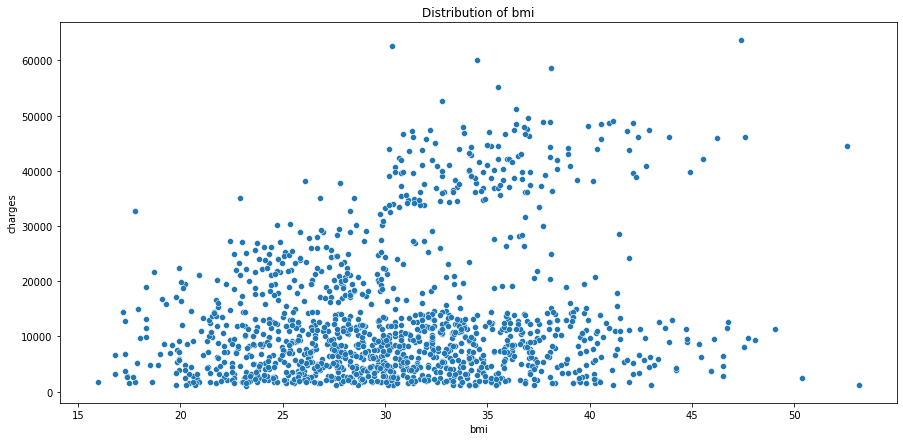

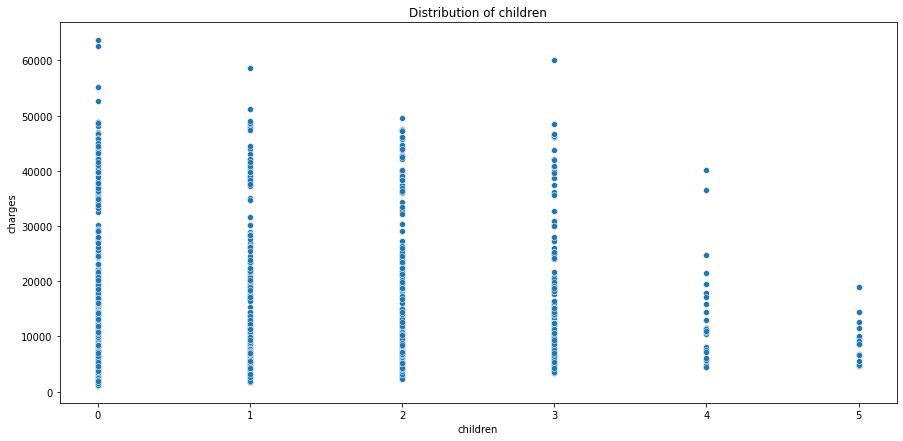

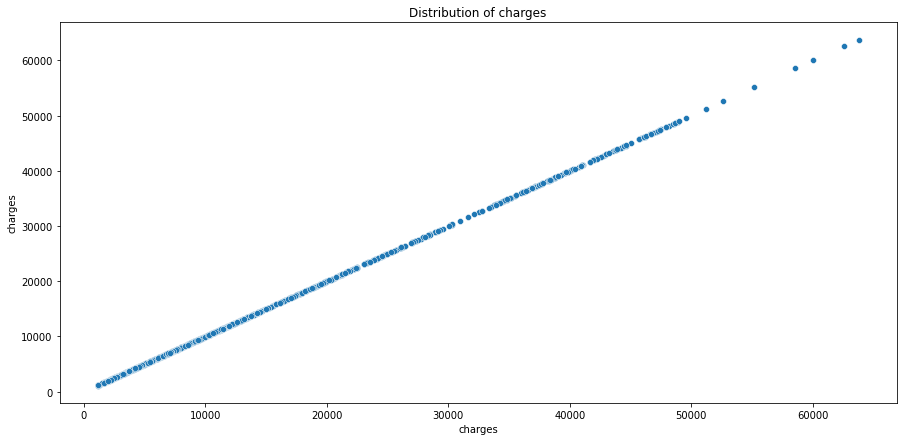

In [ ]:
for i in num:
  plt.figure(figsize = (15, 7))
  plt.title(f'Distribution of {i}')
  sns.scatterplot(x=df[i],y=df['charges'])
  plt.show()

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Akan dicoba pakai label encoder untuk data category
df1 = df.copy()
cat = ['sex','smoker','region']
for kol in cat:
  df1[kol] = df1[kol].astype('category').cat.codes
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int8   
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int8   
 5   region    1338 non-null   int8   
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), int8(3)
memory usage: 45.9 KB


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


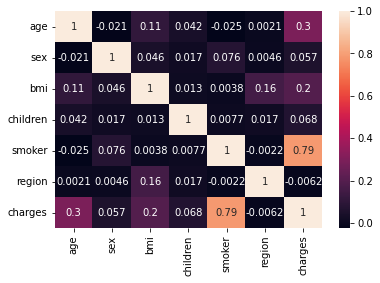

In [ ]:
# Melihat korelasi masing-masing variabel
sns.heatmap(df1.corr(), annot=True)

**Membuat model Regresi Linear**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int8   
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int8   
 5   region    1338 non-null   int8   
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), int8(3)
memory usage: 45.9 KB


In [ ]:
# Split dataset
label = []
for i in df1.columns:
  if i != 'charges':
    label.append(i)
x = df1[label]
y = df1['charges']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Memastikan ukuran data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1070, 6)
(1070,)
(268, 6)
(268,)


In [ ]:
x_train.head()

,age,sex,bmi,children,smoker,region
560,46,0,19.95,2,0,1
1285,47,0,24.32,0,0,0
1142,52,0,24.86,0,0,2
969,39,0,34.32,5,0,2
486,54,0,21.47,3,0,1


In [ ]:
# Melatih data
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
import statsmodels.api as sm
X = x_train
Y = y_train

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        01:57:30   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.182e+04    955.130    -12.371      0.0

In [ ]:
# Melihat r2 score
from sklearn.metrics import r2_score #Untuk evaluasi performa model
model_score = model.score(x_test, y_test)
model_score

0.7833463107364539

In [ ]:
y_pred = model.predict(x_test)
r_r = r2_score(y_test.values, y_pred)
r_r

0.7833463107364539

In [ ]:
model.coef_

array([ 2.57056264e+02, -1.87914567e+01,  3.35781491e+02,  4.25091456e+02,
        2.36478181e+04, -2.71284266e+02])

In [ ]:
model.intercept_

-11946.606567263045

In [ ]:
y_test1 = np.array(y_test)
y_test1

array([ 9095.06825 ,  5272.1758  , 29330.98315 ,  9301.89355 ,
       33750.2918  ,  4536.259   ,  2117.33885 , 14210.53595 ,
        3732.6251  , 10264.4421  , 18259.216   ,  7256.7231  ,
        3947.4131  , 46151.1245  , 48673.5588  , 44202.6536  ,
        9800.8882  , 42969.8527  ,  8233.0975  , 21774.32215 ,
        5080.096   ,  7441.501   ,  1256.299   ,  2755.02095 ,
       11085.5868  , 10923.9332  , 12644.589   , 18804.7524  ,
        9715.841   ,  1131.5066  , 15828.82173 , 11842.62375 ,
        2020.5523  ,  5693.4305  ,  2904.088   ,  7448.40395 ,
        2597.779   ,  7337.748   , 23887.6627  , 38709.176   ,
        4687.797   ,  2643.2685  , 11674.13    , 12124.9924  ,
        4889.9995  , 12333.828   ,  3579.8287  ,  4391.652   ,
       42124.5153  ,  4463.2051  , 13887.204   ,  1719.4363  ,
       28476.73499 ,  1708.92575 , 10594.2257  , 25333.33284 ,
        3645.0894  , 38746.3551  , 11848.141   , 10564.8845  ,
       13880.949   ,  4753.6368  , 27941.28758 ,  8017.

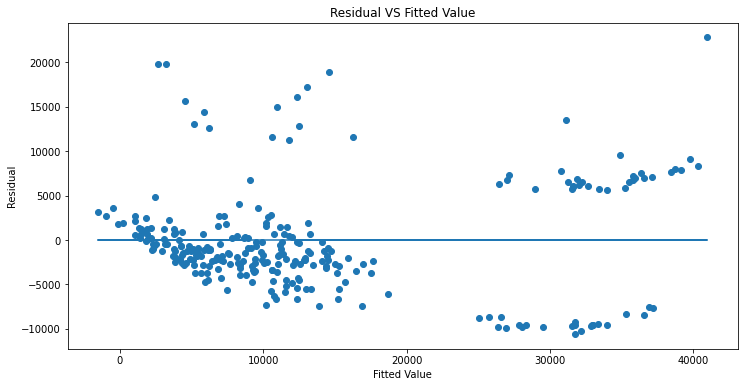

In [ ]:
e = []
for i in range(len(y_pred)):
  ei = y_test1[i] - y_pred[i]
  e.append(ei)
x2 = np.arange(-2,3)
def y2(x):
  return x*0
plt.figure(figsize=(12,6))
plt.scatter(y_pred,e)
plt.plot(y_pred,y2(y_pred))
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.title('Residual VS Fitted Value')
plt.show()

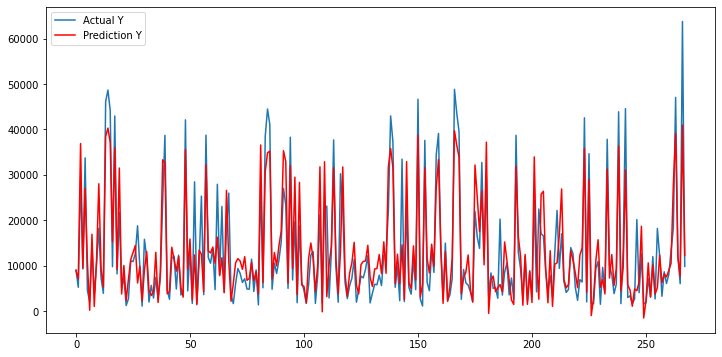

In [ ]:
import numpy as np

plt.figure(figsize=(12,6))
x1 = np.arange(0,268)
plt.plot(x1,y_test,label='Actual Y')
plt.plot(x1,y_pred,'r-',label='Prediction Y')
plt.legend()
plt.show()

((array([-2.79649277, -2.4966039 , -2.32650869, -2.20514436, -2.10955733,
         -2.03007379, -1.96166434, -1.90136582, -1.84727945, -1.79811247,
         -1.7529434 , -1.7110913 , -1.67203817, -1.63538038, -1.60079708,
         -1.56802882, -1.53686267, -1.50712165, -1.47865698, -1.45134236,
         -1.42506958, -1.39974522, -1.37528804, -1.3516269 , -1.32869918,
         -1.30644941, -1.28482825, -1.26379157, -1.24329979, -1.22331718,
         -1.20381147, -1.18475332, -1.16611605, -1.14787525, -1.1300086 ,
         -1.11249556, -1.09531724, -1.07845621, -1.06189633, -1.04562265,
         -1.02962128, -1.01387928, -0.99838461, -0.98312599, -0.96809291,
         -0.95327549, -0.93866447, -0.92425113, -0.91002729, -0.89598523,
         -0.88211765, -0.86841767, -0.85487877, -0.8414948 , -0.82825989,
         -0.81516849, -0.80221533, -0.7893954 , -0.77670391, -0.76413631,
         -0.75168825, -0.73935561, -0.7271344 , -0.71502084, -0.70301131,
         -0.69110233, -0.67929056, -0.

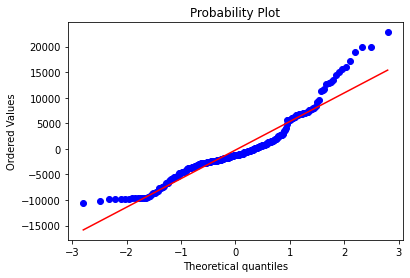

In [ ]:
import scipy.stats as ss
ss.probplot(e,dist='norm',plot=plt)

In [ ]:
# Karena dari tabel sex dan region tidak terlalu signifikan, maka kita hilangkan dari model
x1 = x.drop(columns=['sex','region'])
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   int8   
dtypes: float64(1), int64(2), int8(1)
memory usage: 32.8 KB


In [ ]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x1,y,test_size=0.2,random_state=42)

In [ ]:
# Memastikan ukuran data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1070, 4)
(1070,)
(268, 4)
(268,)


In [ ]:
# Membuat model tanpa region dan sex
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Cek performa
X = x_train
Y = y_train

X2 = sm.add_constant(x1)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        02:00:08   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    941.984    -12.848      0.0

In [ ]:
y_pred = model1.predict(x_test)
r_r = r2_score(y_test.values, y_pred)
r_r

0.7811147722517887

R^2 tidak berubah secara signifikan artinya memang variabel sex dan region tidak memengaruhi model secara signifikan, pilih model tanpa sex dan region

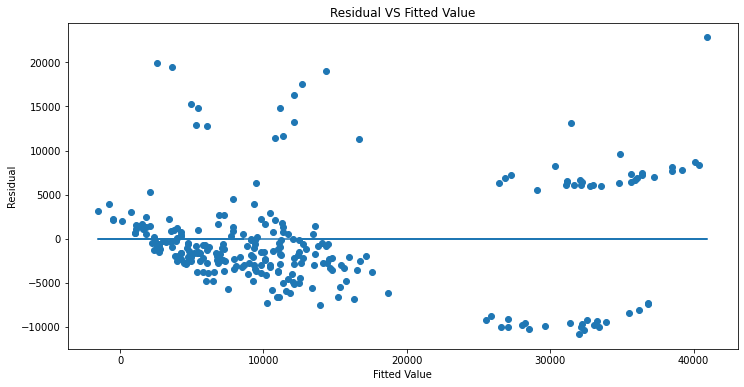

In [ ]:
# Membuat plot residual vs fitted valued
y_test1 = np.array(y_test)
e = []
for i in range(len(y_pred)):
  ei = y_test1[i] - y_pred[i]
  e.append(ei)
x2 = np.arange(-2,3)
def y2(x):
  return x*0
plt.figure(figsize=(12,6))
plt.scatter(y_pred,e)
plt.plot(y_pred,y2(y_pred))
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.title('Residual VS Fitted Value')
plt.show()

((array([-2.79649277, -2.4966039 , -2.32650869, -2.20514436, -2.10955733,
         -2.03007379, -1.96166434, -1.90136582, -1.84727945, -1.79811247,
         -1.7529434 , -1.7110913 , -1.67203817, -1.63538038, -1.60079708,
         -1.56802882, -1.53686267, -1.50712165, -1.47865698, -1.45134236,
         -1.42506958, -1.39974522, -1.37528804, -1.3516269 , -1.32869918,
         -1.30644941, -1.28482825, -1.26379157, -1.24329979, -1.22331718,
         -1.20381147, -1.18475332, -1.16611605, -1.14787525, -1.1300086 ,
         -1.11249556, -1.09531724, -1.07845621, -1.06189633, -1.04562265,
         -1.02962128, -1.01387928, -0.99838461, -0.98312599, -0.96809291,
         -0.95327549, -0.93866447, -0.92425113, -0.91002729, -0.89598523,
         -0.88211765, -0.86841767, -0.85487877, -0.8414948 , -0.82825989,
         -0.81516849, -0.80221533, -0.7893954 , -0.77670391, -0.76413631,
         -0.75168825, -0.73935561, -0.7271344 , -0.71502084, -0.70301131,
         -0.69110233, -0.67929056, -0.

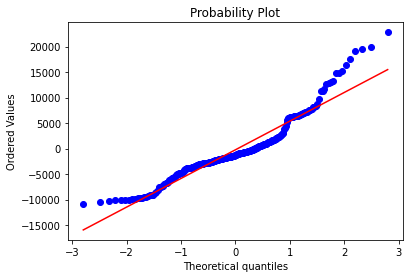

In [ ]:
ss.probplot(e,dist='norm',plot=plt)

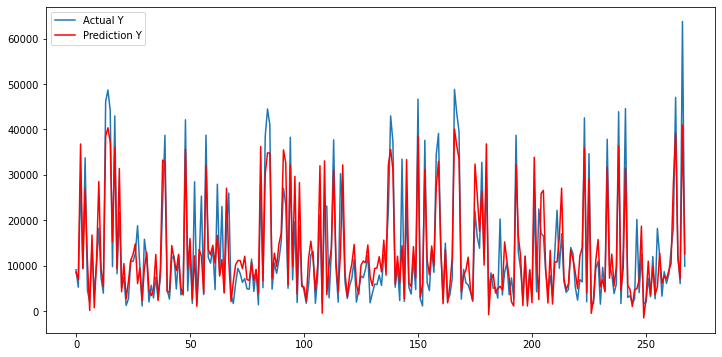

In [ ]:
# Perbandingan prediction value dan actual value
import numpy as np
plt.figure(figsize=(12,6))
x1 = np.arange(0,268)
plt.plot(x1,y_test,label='Actual Y')
plt.plot(x1,y_pred,'r-',label='Prediction Y')
plt.legend()
plt.show()

In [ ]:
# What if bmi becomes category i.e. underweight,normal,overweight
test = df1.copy()
for i in range(len(test)):
  if test['bmi'][i] < 18.5:
    test['bmi'][i]= 0 # Underweight
  elif test['bmi'][i] > 23:
    test['bmi'][i] = 2 # Overweight
  else:
    test['bmi'][i] = 1 # Normal
test.head()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int8   
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int8   
 5   region    1338 non-null   int8   
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), int8(3)
memory usage: 45.9 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# Mengubah
df2 = test.drop(columns=['sex','region'])
df2.head(3)
df2['bmi'] = df2['bmi'].astype('int8')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   int8   
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   int8   
 4   charges   1338 non-null   float64
dtypes: float64(1), int64(2), int8(2)
memory usage: 34.1 KB


In [ ]:
# Split data
kolom = ['age','bmi','children','smoker']
labels = [kol for kol in kolom]
x2 = df2[labels]
y = df2['charges']
x_train,x_test,y_train,y_test = train_test_split(x2,y,test_size=0.2,random_state=42)

In [ ]:
# Memastikan ukuran data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1070, 4)
(1070,)
(268, 4)
(268,)


In [ ]:
x_train.head()

,age,bmi,children,smoker
560,46,1,2,0
1285,47,2,0,0
1142,52,2,0,0
969,39,2,5,0
486,54,1,3,0


In [ ]:
# Membuat model
model2 = LinearRegression()
model2.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Cek performa
X = x_train
Y = y_train

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     700.4
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          2.54e-296
Time:                        16:45:23   Log-Likelihood:                -10880.
No. Observations:                1070   AIC:                         2.177e+04
Df Residuals:                    1065   BIC:                         2.179e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8803.6452   1137.978     -7.736      0.0

In [ ]:
y_pred = model2.predict(x_test)
r_r = r2_score(y_test.values, y_pred)
r_r

0.7560005852280824

In [ ]:
# What if pakai RandomForestRegressor
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.info()
x_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 560 to 1126
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   int8   
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   int8   
 5   region    1070 non-null   int8   
dtypes: float64(1), int64(2), int8(3)
memory usage: 36.6 KB


,age,sex,bmi,children,smoker,region
560,46,0,19.95,2,0,1
1285,47,0,24.32,0,0,0
1142,52,0,24.86,0,0,2
969,39,0,34.32,5,0,2
486,54,0,21.47,3,0,1


In [ ]:
# Build model
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(max_depth=10, random_state=0)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [ ]:
# Cek performa
rf_score = rf.score(x_test, y_test)
rf_score

0.8633659918321879

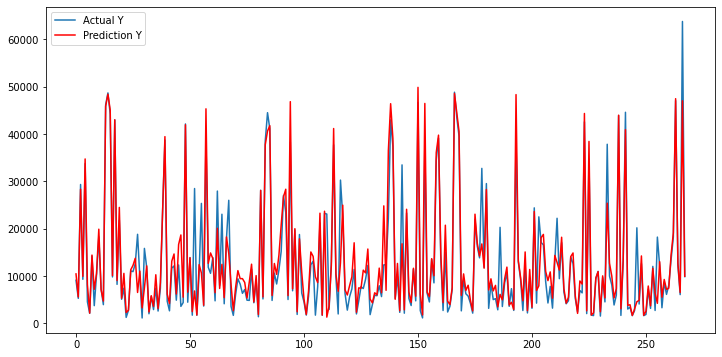

In [ ]:
# Perbandingan prediction value dan actual value
plt.figure(figsize=(12,6))
x1 = np.arange(0,268)
plt.plot(x1,y_test,label='Actual Y')
plt.plot(x1,y_pred,'r-',label='Prediction Y')
plt.legend()
plt.show()